In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import DistanceMetric
from kneed import KneeLocator as kl
import scanpy as sc

# import tkinter as tk
# from tkinter import ttk
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# from matplotlib.figure import Figure
# matplotlib.use("TKAgg")


print('''

Welcome to the data visualization pipeline for tumor microenvironments! This program is designed to help you efficiently and easily 
understand the contents of your single-cell RNA sequencing result through a simple terminal interface. To give you an understanding
of what single-cell RNA sequencing is, the biology behind this project, and more, please feel free to visit https://github.com/devpatelio/SingleCell-Rnaseq/tree/master/cancer-cell-master
and look at the ReadMe for documentation and a walk through for the setup. 

The purpose of this program is to provide a streamlined, simple bioinformatics pipeline to analyze tumor microenvironments at different
resolution levels. The code is built to be modular, allowing the end user to make changes to the quality control, dimensionality reduction, 
k-neighbours, and the final marker-genes themselves. 

To begin, we would ask that you provide the correct, formatted dataset. This program supports 10x Genomics RNASequencing format
in its filtered form. 

''')

init_flag = False
while init_flag == False:
    default_check = input('Are you using the default path? (y/n): ')
    if default_check == 'y':
        path = '/Users/devpatelio/Downloads/Coding/Computational_Biology/SingleCell-RNAseq/cancer-cell-master/filtered_feature_bc_matrix'
        results_file = path + 'hodgkins.h5ad'
    else:
        path = input('Please enter the directory that contains the matrix.mx file: ')
        result_path = input('Please enter the name of your results file that you would like to create (.h5ad): ')

        results_file = path + '/' + result_path

    print('Great, now for some hyperparameters for a visual reference.')

    verbose = int(input('What level of verbose output would you prefer? (1-3): '))

    print('Setting up verbose settings...')
    sc.settings.verbosity = verbose
    sc.settings.set_figure_params(dpi=80, facecolor='lightyellow')
    sc.logging.print_header()

    print('Reading the data...')

    try:
        adata = sc.read_10x_mtx(path, var_names='gene_symbols', cache=True)
        print("Data Read Complete!")
        init_flag = True
        break

    except:
        print('Your folders are not formatted correctly. Make sure you have the following directory settings -> ')
        print('''

        main_folder ->
            barcodes.tsv (barcodes of mRNA)
            features.tsv (gene data)
            matrix.mtx 

        Your path should be the absolute path for your main_folder
        ''')

        continue




Welcome to the data visualization pipeline for tumor microenvironments! This program is designed to help you efficiently and easily 
understand the contents of your single-cell RNA sequencing result through a simple terminal interface. To give you an understanding
of what single-cell RNA sequencing is, the biology behind this project, and more, please feel free to visit https://github.com/devpatelio/SingleCell-Rnaseq/tree/master/cancer-cell-master
and look at the ReadMe for documentation and a walk through for the setup. 

The purpose of this program is to provide a streamlined, simple bioinformatics pipeline to analyze tumor microenvironments at different
resolution levels. The code is built to be modular, allowing the end user to make changes to the quality control, dimensionality reduction, 
k-neighbours, and the final marker-genes themselves. 

To begin, we would ask that you provide the correct, formatted dataset. This program supports 10x Genomics RNASequencing format
in its fi

... reading from cache file cache/Users-devpatelio-Downloads-Coding-Computational_Biology-SingleCell-RNAseq-cancer-cell-master-filtered_feature_bc_matrix-matrix.h5ad


scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.5.3 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 louvain==0.7.0
Reading the data...
Data Read Complete!


normalizing counts per cell
    finished (0:00:00)


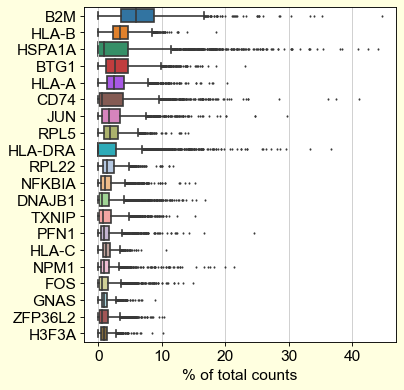

AnnData object with n_obs × n_vars = 3049 × 1253
    var: 'gene_ids', 'feature_types'


In [5]:
flag_top = False
while flag_top == False:
    try:
        top = int(input('How many nth highest genes would you like to view?: '))
        sc.pl.highest_expr_genes(adata, n_top=50)
        print(adata)
        flag_top = True
        break
    except:
        print('Please provide a correct integer value')


... storing 'feature_types' as categorical



    Now, we can begin mitochondrial preprocessing. This will help us identify
    broken cells where upregulation of said genes can indicate a loss of the 
    cell's cytomplasmic content. This means that while the RNA is retained, 
    the cell is dead which is useless for our analysis.

Your dataset consists of cells with the following %s of mitochondrial genes:
0.0%

The unique mitochondrial percentages across the cells based on each unique gene are as follows: {0.0}

        To futher evaluate the quality of the data, we can plot our values
        based on the total genes available, the total cells available, and 
        the percent of our genes that are from the mitochondira. 
    
    


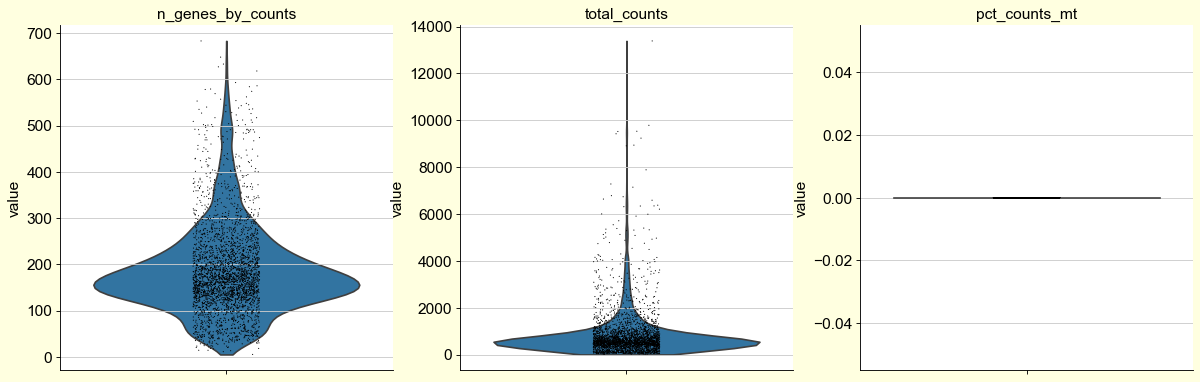


        
 The violin plot here shows the distribution of our data
        based on the gene expression, cell count and more. 
    

    The following jointplot calculates a histogram of the total counts and
    n_genes_by_counts. The goal of this is to evaluate the spread of our data
    by checking its density. Narrower but consisten histograms indicate that 
    the majority of our genes in this dataset are equal in counts, and this is 
    useful for identifying key features of our data.
    


/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

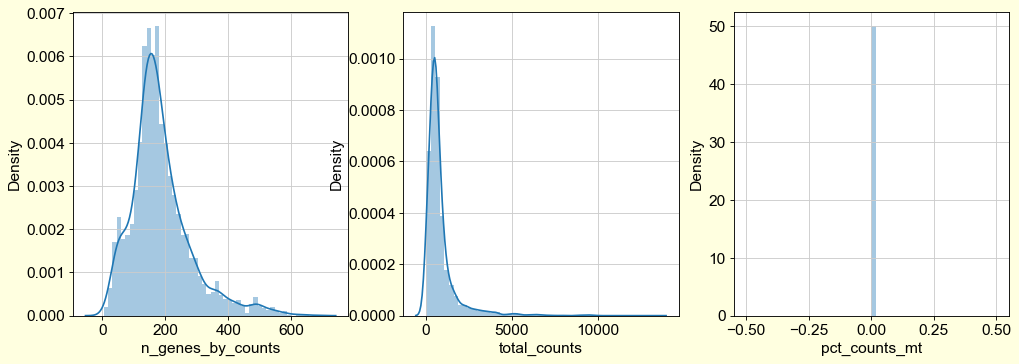

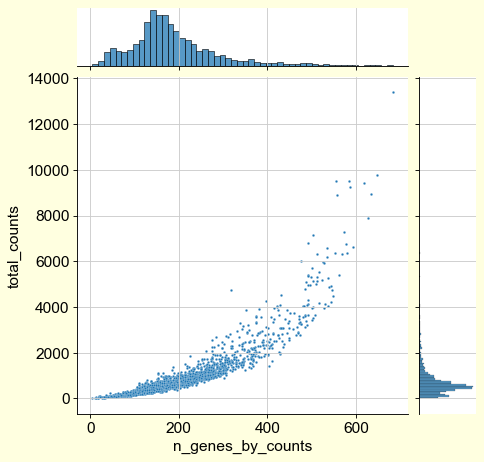

In [6]:
#Looking for genes originating from mitochondrial genes
print('''
    Now, we can begin mitochondrial preprocessing. This will help us identify
    broken cells where upregulation of said genes can indicate a loss of the 
    cell's cytomplasmic content. This means that while the RNA is retained, 
    the cell is dead which is useless for our analysis.
''')


def percent_mitochondrial(data):
    data.var['mt'] = data.var_names.str.startswith('MT-')
    all_keys = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt']
    sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=False, log1p=False, inplace=True)
    diff_percents = set(data.obs.pct_counts_mt.values)
    print(f"Your dataset consists of cells with the following %s of mitochondrial genes:") 
    for i in list(diff_percents):
        print(str(i)+'%')
    
    return data.obs.pct_counts_mt.value_counts, data.obs.pct_counts_mt, set(data.obs.pct_counts_mt.values)

all_counts_length, all_counts, diff_percents = percent_mitochondrial(adata)
print(f"\nThe unique mitochondrial percentages across the cells based on each unique gene are as follows: {diff_percents}")

#Evaluating quality of dataset based on standard measures -> gene counts, total_counts, etc.
def plot_quality(data, objs, k=3):
    
    print('''
        To futher evaluate the quality of the data, we can plot our values
        based on the total genes available, the total cells available, and 
        the percent of our genes that are from the mitochondira. 
    
    ''')

    sc.pl.violin(data, [i for i in objs], multi_panel=True)
    print('''
        \n The violin plot here shows the distribution of our data
        based on the gene expression, cell count and more. 
    ''')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.distplot(data.obs[objs[0]], ax=axes[0])
    sns.distplot(data.obs[objs[1]], ax=axes[1])
    sns.distplot(data.obs[objs[2]], ax=axes[2])

    print('''
    The following jointplot calculates a histogram of the total counts and
    n_genes_by_counts. The goal of this is to evaluate the spread of our data
    by checking its density. Narrower but consisten histograms indicate that 
    the majority of our genes in this dataset are equal in counts, and this is 
    useful for identifying key features of our data.
    ''')

    sns.jointplot(
    x=objs[0],
    y=objs[1],
    data = data.obs,
    kind="scatter",
    s=5
    )

plot_quality(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

filtered out 2025 cells that have less than 200 genes expressed
filtered out 164 genes that are detected in less than 3 cells



    Now, we can begin filtering our cells. Based on these graphs below, 
    we can identify clear outliers in the data that we will need to remove.
    If the mitochondrial gene expression is at 0, you can provide a positive
    integer as a threshold. An ideal gene_count threshold is around 2500, but
    if the dataset is small, you can use the maximum value in the y-axis as the 
    spread of the data is minimal, indicating that it has already been filtered.



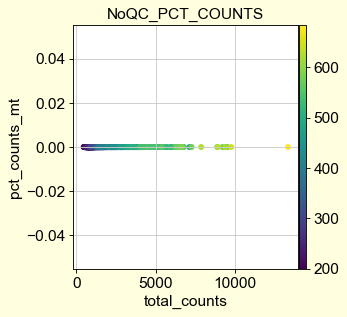

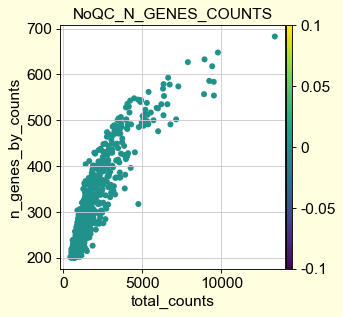

Here is your updated, quality-controlled scatter.


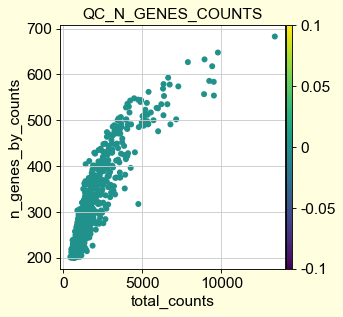

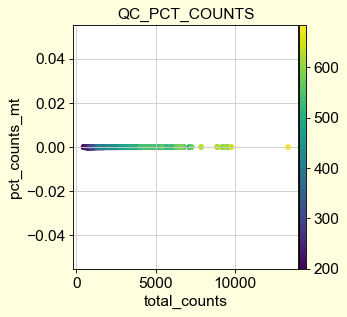

In [10]:
print('''
    Now, we can begin filtering our cells. Based on these graphs below, 
    we can identify clear outliers in the data that we will need to remove.
    If the mitochondrial gene expression is at 0, you can provide a positive
    integer as a threshold. An ideal gene_count threshold is around 2500, but
    if the dataset is small, you can use the maximum value in the y-axis as the 
    spread of the data is minimal, indicating that it has already been filtered.
''')

def calc_filter_nums(data):
    sc.pp.filter_cells(data, min_genes=200)
    sc.pp.filter_genes(data, min_cells=3)

    sc.pl.scatter(data, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts', title='NoQC_PCT_COUNTS')
    sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt', title='NoQC_N_GENES_COUNTS')

    filter_threshold_gene_counts = int(input('Please enter a gene_count filter slice value:'))
    filter_threshold_pct_counts = int(input('Please enter a pct_count_mt filter slice value:'))

    qc_gc = data[data.obs.n_genes_by_counts < filter_threshold_gene_counts, :]

    print('Here is your updated, quality-controlled scatter.')
    sc.pl.scatter(qc_gc, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt', title='QC_N_GENES_COUNTS')    
    try:
        qc_gc = qc_gc[qc_gc.obs.pct_counts_mt < filter_threshold_pct_counts, :]
        sc.pl.scatter(qc_gc, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts', title='QC_PCT_COUNTS')
    except ZeroDivisionError: #Based on mitochondrial gene concentration
        print('Your total percent of mitochondrial genes are 0%')

    return qc_gc

QC_data = adata.copy()
QC_data = calc_filter_nums(QC_data)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)



The next step is to find interesting genes that show high variance apart from the rest. 
These high_variance_genes help showcase differential expression in tissues. For example, 
all tissues are formed by different kinds of cells, and the expression of these
individual genes in these cells can help categorize cell identity and function through 
said phenotype. 

This is represented by the variability, because a high variance indicates that the gene is 
being expressed at a high level. In contrast, cell groups with low variance indicated by the
spread of the poisson distribtion indicate that tissue function is normal in most cases. 
Identifying which genes in which cells are being highly expressed provides some sort of 
indication of what is happening in the microenvironment, so finding these genes is critical
for the discovery process. 

The way this is done here is that the previous data we've filtered out is used, and given
a minimum mean that can identify potential highly_variable 

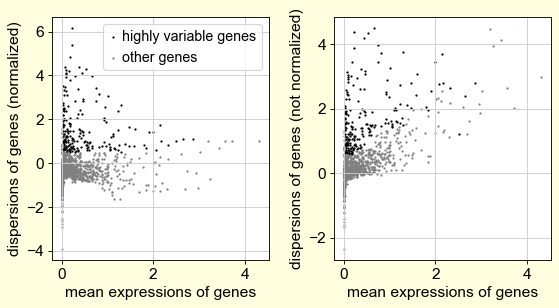

In [12]:
print('''
The next step is to find interesting genes that show high variance apart from the rest. 
These high_variance_genes help showcase differential expression in tissues. For example, 
all tissues are formed by different kinds of cells, and the expression of these
individual genes in these cells can help categorize cell identity and function through 
said phenotype. 

This is represented by the variability, because a high variance indicates that the gene is 
being expressed at a high level. In contrast, cell groups with low variance indicated by the
spread of the poisson distribtion indicate that tissue function is normal in most cases. 
Identifying which genes in which cells are being highly expressed provides some sort of 
indication of what is happening in the microenvironment, so finding these genes is critical
for the discovery process. 

The way this is done here is that the previous data we've filtered out is used, and given
a minimum mean that can identify potential highly_variable genes, a maxmimum mean, and the
minimum spread or displacement of the histogram, we can identify what genes are almost outliers
from the distribution. 

''')


def hvgs (data, target, hyperparams, plot=True):
    print('*Note, hyperparams should be [min_mean, max_mean, min_disp]')
    
    def norm_log_data(data, target):
        sc.pp.normalize_total(data, target_sum=target)
        sc.pp.log1p(data)

    norm_log_data(data, target)
    print('Normalize data by scaling down to 1e4, scale onto log scale.')
    hvgs = data
    print('\nCalculating highly variable genes...')
    sc.pp.highly_variable_genes(hvgs, min_mean=hyperparams[0], max_mean=hyperparams[1], min_disp=hyperparams[2])

    if plot:
        print('\nThe following is a plot of the highly_variable genes identified with the hyperparameters: 1e3 for normalization, 0.0125 as min mean, 3 as max mean and 0.3 as min_displacement.')
        sc.pl.highly_variable_genes(hvgs)
    else:
        pass

    return hvgs


norm_data = QC_data.copy()

HVG = hvgs(norm_data, 1e3, [0.0125, 3, 0.5])

In [12]:
#Remove any effect of the pct_counts after being filtered out and total_counts on data topology (we're looking at highly variable genes so we want to keep the data clean)

print('''
We can now only keep the highly_variable genes we want to work with in a separate dataframe.
Additionally, we need to remove the influence of the total counts and mitochondrial gene pct
as they are irrelevant for the highly variable genes and can skew the results based on the 
previous, non-quality-controlled dataset. 

''')

print('Filtering dataset...')
HVGfiltered = HVG[:, HVG.var.highly_variable]
print(f"HVG Filtered Dataset Attributes: {HVGfiltered}")

print('\nRegressing Total Counts and MT Counts...')
sc.pp.regress_out(HVGfiltered, ['total_counts', 'pct_counts_mt'])

print('\nScaling values...')
sc.pp.scale(HVGfiltered, max_value=10)

print(len(HVGfiltered))  #HVG Counts
print(len(adata))  #All Genes Count
print(f"The total % of all data that is of interest based on its high variability is {round(len(HVGfiltered)/len(adata) * 100, 3)}%") #Calculate total HVG interest


We can now only keep the highly_variable genes we want to work with in a separate dataframe.
Additionally, we need to remove the influence of the total counts and mitochondrial gene pct
as they are irrelevant for the highly variable genes and can skew the results based on the 
previous, non-quality-controlled dataset. 


Filtering dataset...
HVG Filtered Dataset Attributes: View of AnnData object with n_obs × n_vars = 1024 × 240
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

Regressing Total Counts and MT Counts...

Scaling values...
1024
3049
The total % of all data that is of interest based on its high variability is 33.585%


Total High Variable Genes: 240

Now that we have created our dataset, we need to be able to analyze our tumor microenvironment
and differentiate different cell clusters based on their gene actvitiy. However, we have 240
and 240 cell samples which is a very high dimensional dataset. 

To not only reduce the complexity of our dataset, but evaluate the topology of the cells relative to their gene 
correlation and activity with other cells, we can use principle component analysis. The following code uses this 
logic: 

    1. Take features n-N/2 and (N/2)+1 of the different genes for all samples
    2. Calculate average of both axis by calculating average of both feature columns
    3. Shift data where average becomes center or origin (relative to 0, 0) or mean
    4. Fit line of best fit/slope set by minimizing the squared sum of the perpendicular distance for each datapoint to the line OR maximize squared sum of distances of perpendicular projects on best line of fit from the origin/mean

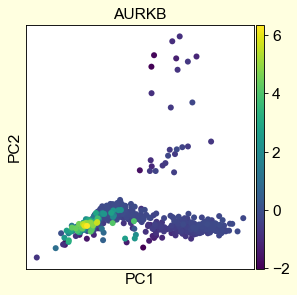

Calculating variance ratio of each PCA for capture...


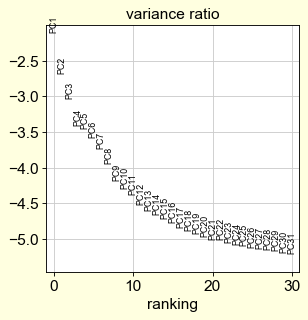

Calculating loadings for influence on final plot...


/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0, flags=flags)


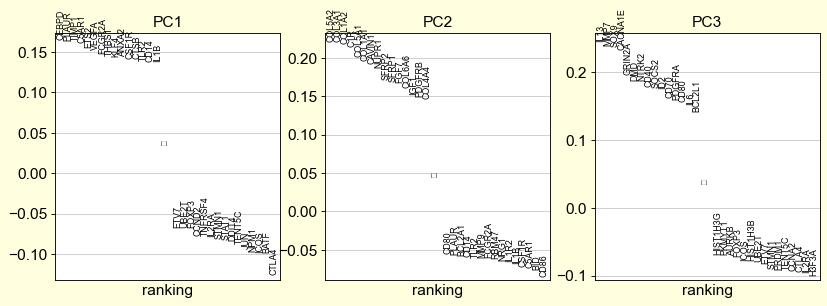

Updated HVG: AnnData object with n_obs × n_vars = 1024 × 240
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [13]:
import random

high_variable_genes_names = HVGfiltered.var_names
print(f"Total High Variable Genes: {len(high_variable_genes_names)}")


print(f'''
Now that we have created our dataset, we need to be able to analyze our tumor microenvironment
and differentiate different cell clusters based on their gene actvitiy. However, we have {len(high_variable_genes_names)}
and 240 cell samples which is a very high dimensional dataset. 

To not only reduce the complexity of our dataset, but evaluate the topology of the cells relative to their gene 
correlation and activity with other cells, we can use principle component analysis. The following code uses this 
logic: 

    1. Take features n-N/2 and (N/2)+1 of the different genes for all samples
    2. Calculate average of both axis by calculating average of both feature columns
    3. Shift data where average becomes center or origin (relative to 0, 0) or mean
    4. Fit line of best fit/slope set by minimizing the squared sum of the perpendicular distance for each datapoint to the line OR maximize squared sum of distances of perpendicular projects on best line of fit from the origin/mean
    5. Best fit computes Principle Component assigned to slope relative to origin (scalar value) to embed type of relationship + variance (slope is ratio of spread of the data)
    6. PC1 is fundamentally computing a linear combination of n-N/2 and N/2+1-N and its respective principal components
    7. Scale values with unit vector of 1 as slope to implement Single-Value-Decomposition (distance from origin to point is unit vector scaled known as eigenvector of PC1) -> use eigenvalues to determine relationship of PC1
    8. Sqrt of Eigenvalues = PC1 single value 
    9. PC2 is perpendicular to PC1 (alternative or orthogonal representation of PC1 relationship with second axis, repeat process to compute scaled eigenvalues and vectors with loading scores)
    10. Determine most important PC by calculating Eigenvalues which represents the variation of PCs
    11. Repeat process for all features in PC plot, collect eigenvalues for all PCs generated and account for variation (not done in while loop, done at the same time, while loop comes at step h to compute principal components for all given dimensions on 2-D planes (perpendicular to all possible sets of perpendicular fits)
    12. Plot all variances in scree Plot, pick d-highest (d represents dimension of PCA you want to reduce to, does not have to be 2 or 3 since this is all done using matrix multiplication in numpy)
    13. Use respective data points on both PCs on d-D axis through SVD for both PCs (because all PCs are perpendicular representations of PC1, respective points can be found by their respective value)

''')

sc.tl.pca(HVGfiltered, svd_solver='arpack')
print('Calculating and plotting principal components.....')
sc.pl.pca(HVGfiltered, color=random.choice(high_variable_genes_names))

print('Calculating variance ratio of each PCA for capture...')
sc.pl.pca_variance_ratio(HVGfiltered, log=True)
print('Calculating loadings for influence on final plot...')
sc.pl.pca_loadings(HVGfiltered)
HVGfiltered.write(results_file)
print(f'Updated HVG: {HVGfiltered}')


In [15]:
print('''

While we have calculated the best principal components, it is important to find PCs that we 
can ignore following a Knee trend in the graph. We can then use this filtered dataset and 
calculate more accurate PCs that better represent the data. 

''')

def PCA_Elbow_fit(data): #We look each pricniple component based on its proportion of variance, and only include the pcs once a drop in variance is found 
    model = sklearn.decomposition.PCA()
    model.fit(data) #calculate PCA on data inputted
    explained_variance = model.explained_variance_ratio_ #look at the variance ratio or loadings
    pcs = list(range(1, explained_variance.shape[0]+1)) #renumber all pcs from 1 to all variance_shapes (index 0 provides number)
    klm = kl(pcs, explained_variance, S=1.0, curve='convex', direction='decreasing') #knee locator finds the drop in variance with a convex curve (can be concave too), direction is based on PC order
    klm.plot_knee()
    pcs_used = klm.knee #find the pcs up until the start of the knee (attribute of klm object)
    pc_list = list(range(1, pcs_used+1))  #lists all numbers of PCs used
    new_data = sklearn.decomposition.PCA(n_components=pcs_used, svd_solver='arpack').fit_transform(data) #recalculate PCA on data with only the total PCA components found

   
    return pcs_used, new_data, pcs, explained_variance, pc_list #return number of pcs, PC data embedding with new PCS, number of all initial PCs, variance of previous PCs, list of all new PCs

label = "HVGfiltered"
print('Generating empty pc dataframe...')
new_frame = pd.DataFrame(HVGfiltered.X, index=HVGfiltered.obs_names, columns=HVGfiltered.var_names) #only want the variable names, objects, and expression values
pandas_data = new_frame.values #assign values to a new frame




While we have calculated the best principal components, it is important to find PCs that we 
can ignore following a Knee trend in the graph. We can then use this filtered dataset and 
calculate more accurate PCs that better represent the data. 


Generating empty pc dataframe...


Calcuating PCA Elbow fit on formatted data...
Total PCs generated: 17
                        PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACCCAGTATTTCCT-1 -4.737696 -1.808935 -4.260546 -0.712069  3.831946   
AAACGAAGTGGGTATG-1  3.864460 -4.350159 -5.045164  0.548503 -4.118455   

                        PC_6      PC_7      PC_8      PC_9     PC_10  \
AAACCCAGTATTTCCT-1 -0.765929  0.449930  0.899389 -1.656464  0.181559   
AAACGAAGTGGGTATG-1 -1.614732 -0.120298  0.752262 -1.869769 -0.510354   

                       PC_11     PC_12     PC_13     PC_14     PC_15  \
AAACCCAGTATTTCCT-1  1.595950 -0.675166 -3.970787 -0.190179  0.590699   
AAACGAAGTGGGTATG-1 -1.305397  1.975726  0.207803 -0.257922  0.655798   

                       PC_16     PC_17  
AAACCCAGTATTTCCT-1  1.147153  1.186843  
AAACGAAGTGGGTATG-1 -1.147462  0.712763  
(1024, 17)


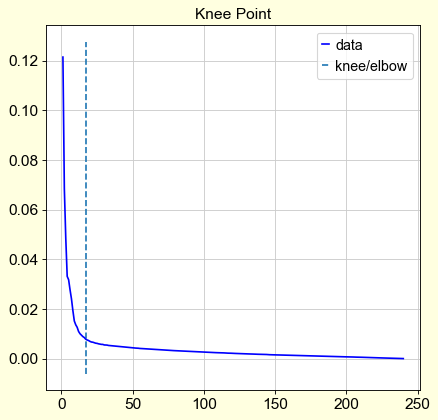

In [16]:
print('Calcuating PCA Elbow fit on formatted data...')
dim, new_pca_data, pc_ax, pc_ay, col_labels = PCA_Elbow_fit(pandas_data) #calculate PCA Elbow fit on formatted data
print(f"Total PCs generated: {dim}") #17 PCs were used out of the 31

output_path = path + '_PCA_' + label + str(dim) + '.csv' #output these values to a csv for reference
PC_frame = pd.DataFrame(new_pca_data, index=new_frame.index.values.tolist(), columns=['PC_' + str(i) for i in col_labels]) #create dataframe with and columns to create dataframe with PC variance ratio with respect to each gene (PC_1 will always have highest variance)
print(PC_frame.head(2))
print(PC_frame.shape)

In [31]:
#Unit test -> check if PCA plot effectively matched at knee point and did not stall

def shape_check(new_pca_df, hvg_data):
    assert new_pca_df.shape[-1] < hvg_data.shape[-1], f"PCA Dim: {new_pca_df.shape[-1]} \nHVG Dim: {hvg_data.shape[-1]}"
    assert new_pca_df.shape[0] == hvg_data.shape[0], f"Incorrect feature selection, choose correct dataset"

    print(f"PCA Dim: {new_pca_df.shape[-1]} \nHVG Dim: {hvg_data.shape[-1]}")


shape_check(PC_frame, HVG)

PCA Dim: 17 
HVG Dim: 1089



    After reducing the dimensions in the data, we can plot the topology of the 
    cells based on their gene expression using different kinds of maps through
    clustering. We use k-means clustering to separate our data into 
    k clusters in an unsupervised fashion. The algorithm in the code works as
    follows: 
        
        1. Iterate for each potential k-value in range(8, 20)
        2. Randomly assign values to each centroid (centroids act as mean of cluster, and num. centroids = k)
        3. Best_sum_accuracy is assigned as infinite
        4. While the Best_sum_accuracy is higher than calculated Dunn index, repeat the following steps
        5. Iterate over each datapoint and calculate distance of each datapoint from each centroid, assign the data point to closest centroid
        6. Calculate mean of current assigned data point based on their centroid assignment, this mean is now assigned as new centroid
        7. Calculate Dunn index for new positioning of centroid,

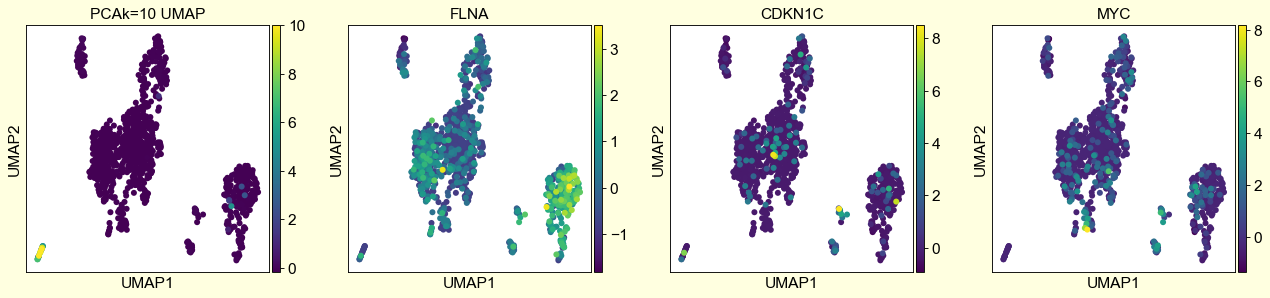

Generating TSNE...


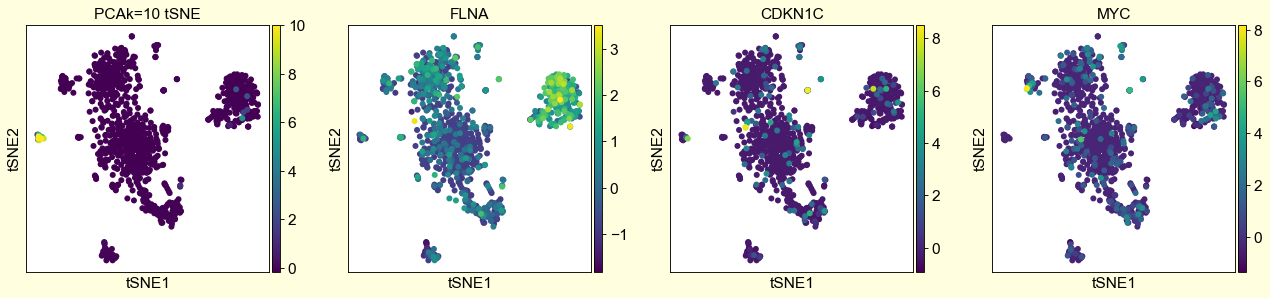

Successful plot generation.


In [26]:
#Computing neighbourhood graphs

pcaHVG10 = HVGfiltered.copy()

print('''
    After reducing the dimensions in the data, we can plot the topology of the 
    cells based on their gene expression using different kinds of maps through
    clustering. We use k-means clustering to separate our data into 
    k clusters in an unsupervised fashion. The algorithm in the code works as
    follows: 
        
        1. Iterate for each potential k-value in range(8, 20)
        2. Randomly assign values to each centroid (centroids act as mean of cluster, and num. centroids = k)
        3. Best_sum_accuracy is assigned as infinite
        4. While the Best_sum_accuracy is higher than calculated Dunn index, repeat the following steps
        5. Iterate over each datapoint and calculate distance of each datapoint from each centroid, assign the data point to closest centroid
        6. Calculate mean of current assigned data point based on their centroid assignment, this mean is now assigned as new centroid
        7. Calculate Dunn index for new positioning of centroid, assign it to Best_sum_accuracy if it is less than
        8. Repeat process until you align centroids
''')



def tsne_umap_plot(k, var_k, color_n=3, colors=None):
    assert type(var_k) is type(adata), "Should have PCA plot"
    if colors == None:
        colors = random.sample(list(high_variable_genes_names), color_n)
    sc.pp.neighbors(var_k, n_neighbors=k)   #calculate k-neighbours
    
    #UMAP
    print('Generating UMAP...')
    sc.tl.umap(var_k)
    sc.pl.umap(var_k, color=colors, title=f'PCAk={k} UMAP')

    #TSNE
    print('Generating TSNE...')
    sc.tl.tsne(var_k)
    sc.pl.tsne(var_k, color=colors, title=f'PCAk={k} tSNE')


flag_check = False #Flag for checking if input is valud
while flag_check == False:
    k_neighbours = int(input('Provide a possible value for k to designate the total number of neighbours (default=10): '))
    try: #made sure that the integer for k did not exceed possible clusters and was calculated before plotting
        tsne_umap_plot(k_neighbours, pcaHVG10, 4)
        print('Successful plot generation.')
        break
    except:
        print('Please provide a valid integer value for k.')





In [29]:
def check_AnnData(data):
    assert data.uns['umap'], "Need to create UMAP plot"
    assert data.uns['pca'], "Need to create pca plot"
    assert 'X_pca' and 'X_umap' and 'X_tsne' in data.obsm, "Requires Topoligical Representation Of Data, Refer to sc.tl.tsne, umap"


check_AnnData(pcaHVG10)



After generating our parameter space, clustering algorithm leiden
will automatically use our k-neighbours embedding to identify clusters
based on the PCA plot we've generated. 


Generating leiden cluster...


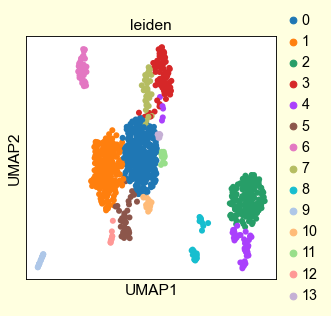

In [20]:
#Generating clusters in data
# fig, axes = plt.subplots(1, 4, figsize=(15, 5))

print('''

After generating our parameter space, clustering algorithm leiden
will automatically use our k-neighbours embedding to identify clusters
based on the PCA plot we've generated. 

''')

print('Generating leiden cluster...')
sc.tl.leiden(pcaHVG10)
sc.pl.umap(pcaHVG10, color=['leiden']) #leiden directly uses the k-neighbours plot based on our different PCA embeddings, so the result will look different
pcaHVG10.write(results_file)




Based on the total clusters identified, identifying the correct
gene name can be found by utilizing the highest-variance genes 
with respect to their z-scores. The first step is to rank the 
genes accordingly in our dataset. 


Generating ranks...


/Users/devpatelio/miniconda3/envs/sc-rnaseq/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


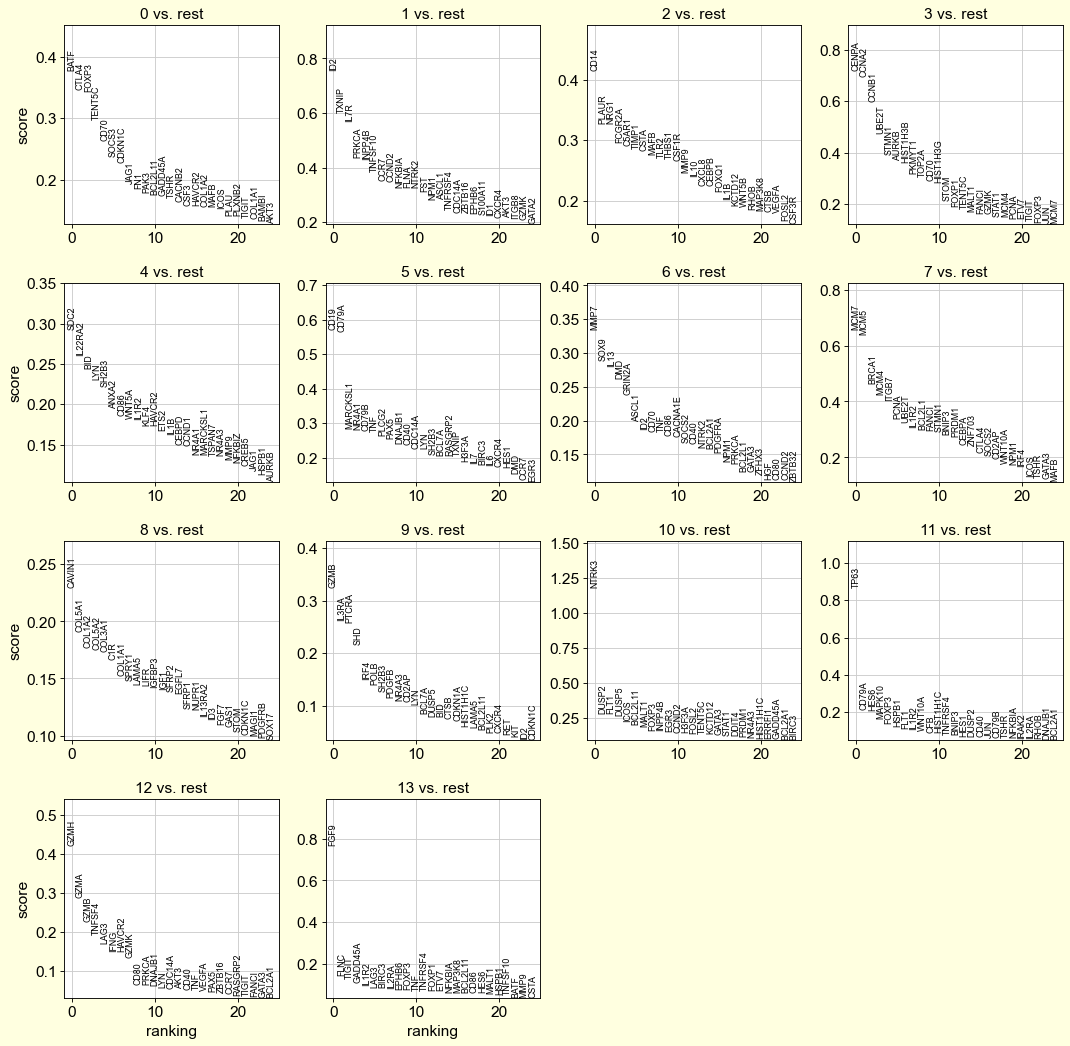

In [22]:
#Labelling clusters with marker genes
#Utilize 1024 HVGs and their respective names to choose the correct subplot cells based on this cluter method

print('''

Based on the total clusters identified, identifying the correct
gene name can be found by utilizing the highest-variance genes 
with respect to their z-scores. The first step is to rank the 
genes accordingly in our dataset. 

''')

print('Generating ranks...')
sc.tl.rank_genes_groups(pcaHVG10, 'leiden', method='logreg')
sc.pl.rank_genes_groups(pcaHVG10, n_genes=25, sharey=False)



In [23]:

#Fetch data for all ranked gene groups
res = pcaHVG10.uns['rank_genes_groups']


print('Generating names for ranked genes...')
groups = res['names'].dtype.names
name_attributes = ['names', 'scores']

print('Calculating z-scores...')
df_markers = pd.DataFrame({g+'-'+key: res[key][g] for g in groups for key in name_attributes})
df_markers.head()

print('''
    The dataframe looks at each cluster and the highest_variable_genes ranked based on its z_score (how similar the hvg to mean expression 
    value of the cluster), higher score indicates this gene's standard deviation is the lowest with respect to the cluster. 
''')

#dataframe looks at each cluster and the highest_variable_genes ranked based on its z_score (how similar the hvg to mean expression value of the cluster), higher score indicates this gene's standard deviation is the lowest with respect to the cluster
marker_names = [i for i in df_markers.iloc[0] if type(i) == str] #get first top row
print(f"All identified cluster gene names: {marker_names}")

Generating names for ranked genes...
Calculating z-scores...

    The dataframe looks at each cluster and the highest_variable_genes ranked based on its z_score (how similar the hvg to mean expression 
    value of the cluster), higher score indicates this gene's standard deviation is the lowest with respect to the cluster. 

All identified cluster gene names: ['BATF', 'ID2', 'CD14', 'CENPA', 'SDC2', 'CD19', 'MMP7', 'MCM7', 'CAVIN1', 'GZMB', 'NTRK3', 'TP63', 'GZMH', 'FGF9']


Renaming cluster plot...
New plot for UMAP with marker genes


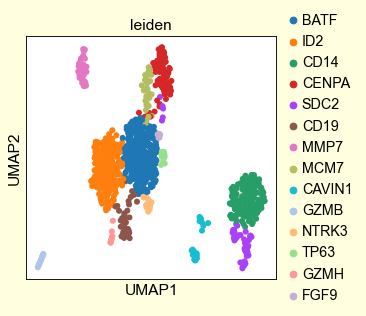


We can also look at the strenght of the connections between different groups and clusters by calculating
the partion-based graph abstraction. This simplifies the relationships between clusters and can help identify
key points in terms of the velocity and trajectory of certain cells in a cell cycle, or look at
how similar or different and even the order of cellular processes with respect to gene expression to reveal
key findings about the mechanisms that this tumor microenvironment utilizes to repress immune checkpoint
inhibitors. 

This is just a taste of the possible trajectory inference we can conduct on a polytimescale...



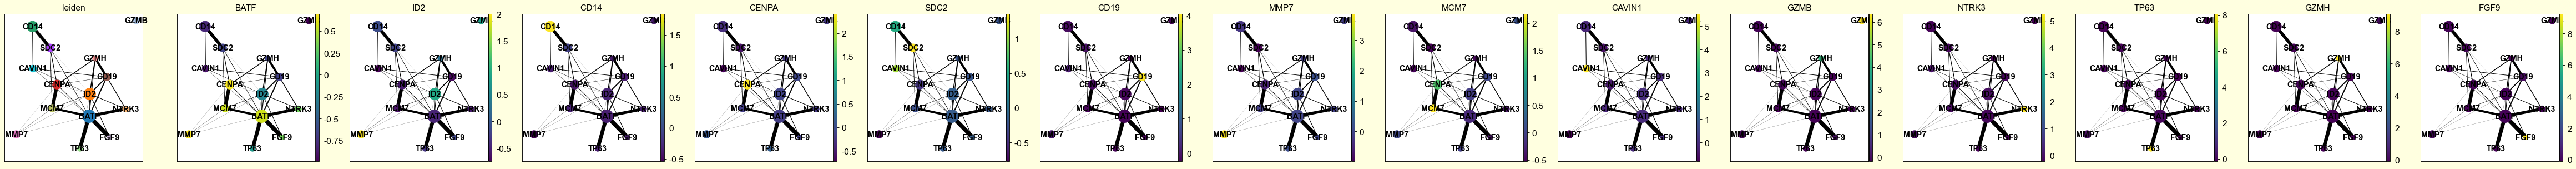

The stacked violin and dotplot showcase the correlation and density of said clusters with respect to their similarity with the marker genes.


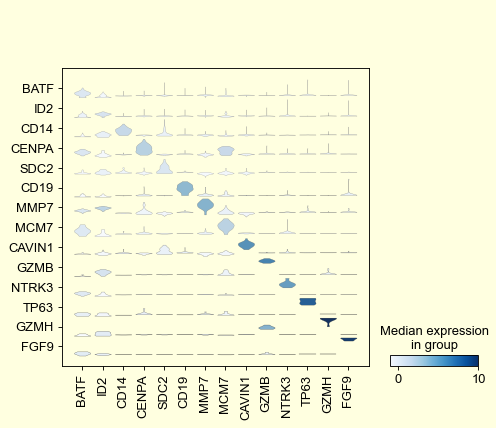

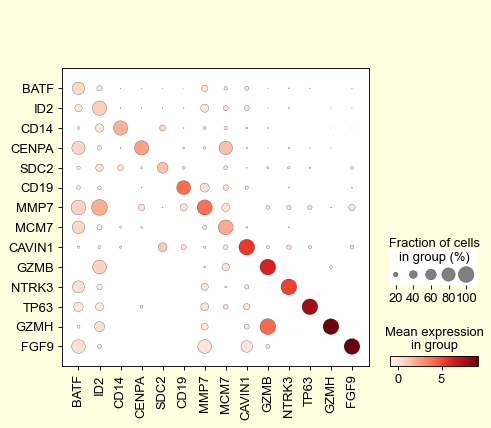

In [24]:

print('Renaming cluster plot...')
pcaHVG10.rename_categories('leiden', marker_names)
print('New plot for UMAP with marker genes')
sc.pl.umap(pcaHVG10, color='leiden')

print('''
We can also look at the strenght of the connections between different groups and clusters by calculating
the partion-based graph abstraction. This simplifies the relationships between clusters and can help identify
key points in terms of the velocity and trajectory of certain cells in a cell cycle, or look at
how similar or different and even the order of cellular processes with respect to gene expression to reveal
key findings about the mechanisms that this tumor microenvironment utilizes to repress immune checkpoint
inhibitors. 

This is just a taste of the possible trajectory inference we can conduct on a polytimescale...
''')
sc.tl.paga(pcaHVG10, groups='leiden')
sc.pl.paga(pcaHVG10, color=['leiden'] + marker_names)


print('The stacked violin and dotplot showcase the correlation and density of said clusters with respect to their similarity with the marker genes.')
sc.pl.stacked_violin(pcaHVG10, marker_names, groupby='leiden')
sc.pl.dotplot(pcaHVG10, marker_names, groupby='leiden')

In [25]:
while True:
    save = input('Would you like to save your outputs to a zipfile? (y/n): ')
    if save == 'y':
        pcaHVG10.write(results_file, compression='gzip')
        break
    elif save == 'n':
        print('Feel free to save any of the figures created above, all results are written to your save file.')
        break
    else:
        print('Please provide a valid input.')



#save dataset object


Please provide a valid input.
Feel free to save any of the figures created above, all results are written to your save file.
